In [1]:
import sys
sys.path.insert(0, '../scripts')
from load_data_df import *

# Data Paths

In [2]:
# AES
aes_data_dir   = '/Users/ti27457/Repos/ttb/circuits/aes/tjfree_75eds'
# aes_data_dir   = '/Volumes/TI27457/ttb/circuits/aes/tjfree_75eds'

# UART
uart_data_dir = '/Users/ti27457/Repos/ttb/circuits/uart/tjfree_16bytes'
# uart_data_dir = '/Volumes/TI27457/ttb/circuits/uart/tjfree_16bytes'

# OR1200
or1200_data_dir = '/Users/ti27457/Repos/ttb/circuits/or1200/tjfree_combined'
# or1200_data_dir = '/Users/ti27457/Repos/ttb/circuits/or1200/tjfree_combined'

# PICORV32
picorv32_data_dir = '/Users/ti27457/Repos/ttb/circuits/picorv32'
# or1200_data_dir = '/Users/ti27457/Repos/ttb/circuits/picorv32'

# Plot Settings

In [46]:
# Plot Settings
FIG_WIDTH             = 12
FIG_HEIGHT            = 6
HIST_SAVE_AS_PDF      = True
AES_FP_SAVE_AS_PDF    = True
UART_FP_SAVE_AS_PDF   = True
OR1200_FP_SAVE_AS_PDF = True

# Plot PDF Filenames
HIST_PDF_FILENAME      = 'cntr_sizes_histogram.pdf'
AES_FP_PDF_FILENAME    = 'aes-50tests-100res-100ps-2x.pdf'
UART_FP_PDF_FILENAME   = 'uart-1tests-10000res-100ps-2x.pdf'
OR1200_FP_PDF_FILENAME = 'or1200-1tests-100000res-100ps-combined-2x.pdf'

# Plot Counter Size Histogram

Histogram: [  0 344   0  40   0  22]
Bins:      [  0   8  16  32  64 128 256]
Histogram: [91 40  2  2  0  0]
Bins:      [  0   8  16  32  64 128 256]
Histogram: [140   5   1  68   8   0]
Bins:      [  0   8  16  32  64 128 256]


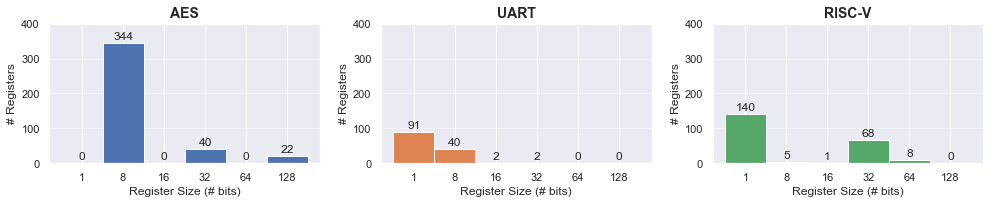

In [4]:
def plt_histogram(data, ax, title, color_index):
    bins = [0,8,16,32,64,128,256] # your bins

    # Create Histogram
    hist, bin_edges = np.histogram(data,bins) # make the histogram
    print "Histogram:", hist
    print "Bins:     ", bin_edges
    
    # Make x-tick labels list
    xtick_labels    = ['{}'.format(bins[i]) for i,j in enumerate(hist)]
    xtick_labels[0] = 1
    
    # Plot Histogram
    ax.bar(\
        range(len(hist)),\
        hist,\
        width      = 1,\
        align      = 'center',\
        tick_label = xtick_labels, \
        color      = current_palette[color_index])

    # Format Histogram
    ax.set_title(title, fontweight='bold', fontsize=14)
    ax.set_xlabel('Register Size (# bits)', fontsize=12)
    ax.set_ylabel('# Registers', fontsize=12)
    ax.grid(axis='y', alpha=0.5)
    ax.set_ylim(0, 400)
#     for tick in ax.get_xticklabels():
#         tick.set_rotation(45)
    
    # Text on the top of each barplot
    for i in range(len(hist)):
        ax.text(x = i , y = hist[i] + 10, s = hist[i], size = 12, horizontalalignment='center')

# Load Data
aes_counter_sizes      = load_counter_sizes(aes_data_dir)
uart_counter_sizes     = load_counter_sizes(uart_data_dir)
or1200_counter_sizes   = load_counter_sizes(or1200_data_dir)
picorv32_counter_sizes = load_counter_sizes(picorv32_data_dir)

# Create Figure
sns.set()
current_palette = sns.color_palette()
fig, axes = plt.subplots(1, 3, figsize=(14, 3))

# AES Histogram
plt_histogram(aes_counter_sizes['Coalesced Sizes'], axes[0], 'AES', 0)

# UART Histogram
plt_histogram(uart_counter_sizes['Coalesced Sizes'], axes[1], 'UART', 1)

# # OR1200 Histogram
# plt_histogram(or1200_counter_sizes['Coalesced Sizes'], axes[2], 'OR1200', 2)

# PICORV32 Histogram
plt_histogram(picorv32_counter_sizes['Coalesced Sizes'], axes[2], 'RISC-V', 2)

# Save Histogram to PDF
plt.tight_layout(h_pad=1)
if HIST_SAVE_AS_PDF:
    plt.savefig(HIST_PDF_FILENAME, format='pdf')
plt.show()

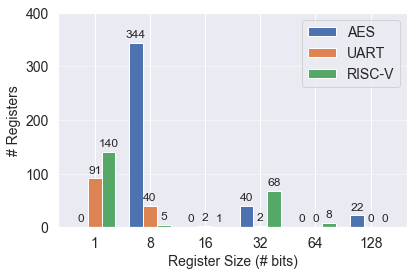

In [44]:
def plt_histogram_grouped(data_1, data_2, data_3, ax):
    bins = [0,8,16,32,64,128,256] # your bins

    # Create Histograms
    hist_1, bin_edges_1 = np.histogram(data_1, bins) # make the histogram
    hist_2, bin_edges_2 = np.histogram(data_2, bins) # make the histogram
    hist_3, bin_edges_3 = np.histogram(data_3, bins) # make the histogram
    
    # Make x-tick labels list
    xtick_labels    = ['{}'.format(bins[i]) for i,j in enumerate(hist_1)]
    xtick_labels[0] = 1
    
    # Set bar widths
    bar_width = 0.25
    r_2 = np.arange(len(hist_1))
    r_1 = [x - bar_width for x in r_2]
    r_3 = [x + bar_width for x in r_2]
#     r_1 = np.arange(len(hist_1))
#     r_2 = [x + bar_width for x in r_1]
#     r_3 = [x + bar_width for x in r_2]
    
    # Plot Histogram
    ax.bar(r_1, hist_1, color=current_palette[0], width=bar_width, edgecolor='white', label='AES')
    ax.bar(r_2, hist_2, color=current_palette[1], width=bar_width, edgecolor='white', label='UART')
    ax.bar(r_3, hist_3, color=current_palette[2], width=bar_width, edgecolor='white', label='RISC-V')

    # Format Histogram
    plt.xticks(r_2, xtick_labels, fontsize=14)
    plt.yticks(range(0, 401, 100), range(0, 401, 100), fontsize=14)
    plt.legend(fontsize=14)
    ax.set_xlabel('Register Size (# bits)', fontsize=14)
    ax.set_ylabel('# Registers', fontsize=14)
    ax.grid(axis='y', alpha=0.5)
    ax.set_ylim(0, 400)

    # Text on the top of each barplot
    for i in range(len(hist_1)):
        ax.text(x = i - bar_width, y = hist_1[i] + 10, s = hist_1[i], size = 12, horizontalalignment='center')
        ax.text(x = i            , y = hist_2[i] + 10, s = hist_2[i], size = 12, horizontalalignment='center')
        ax.text(x = i + bar_width, y = hist_3[i] + 10, s = hist_3[i], size = 12, horizontalalignment='center')

# Load Data
aes_counter_sizes      = load_counter_sizes(aes_data_dir)
uart_counter_sizes     = load_counter_sizes(uart_data_dir)
picorv32_counter_sizes = load_counter_sizes(picorv32_data_dir)

# Create Figure
sns.set()
current_palette = sns.color_palette()
fig, axes = plt.subplots(1, 1, figsize=(6, 4))

# AES Histogram
plt_histogram_grouped(\
    aes_counter_sizes['Coalesced Sizes'],\
    uart_counter_sizes['Coalesced Sizes'],\
    picorv32_counter_sizes['Coalesced Sizes'],\
    axes)

# Save Histogram to PDF
plt.tight_layout(h_pad=1)
if HIST_SAVE_AS_PDF:
    plt.savefig('cntr_sizes_histogram_grouped.pdf', format='pdf')
plt.show()

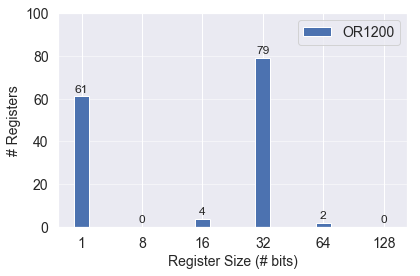

In [54]:
def plt_histogram_single(data_1, ax):
    bins = [0,8,16,32,64,128,256] # your bins

    # Create Histograms
    hist_1, bin_edges_1 = np.histogram(data_1, bins) # make the histogram
    
    # Make x-tick labels list
    xtick_labels    = ['{}'.format(bins[i]) for i,j in enumerate(hist_1)]
    xtick_labels[0] = 1
    
    # Set bar widths
    bar_width = 0.25
    r_1 = np.arange(len(hist_1))
    
    # Plot Histogram
    ax.bar(r_1, hist_1, align='center', color=current_palette[0], width=bar_width, edgecolor='white', label='OR1200')

    # Format Histogram
    plt.xticks(r_1, xtick_labels, fontsize=14)
    plt.yticks(range(0, 101, 20), range(0, 101, 20), fontsize=14)
    plt.legend(fontsize=14)
    ax.set_xlabel('Register Size (# bits)', fontsize=14)
    ax.set_ylabel('# Registers', fontsize=14)
    ax.grid(axis='y', alpha=0.5)
    ax.set_ylim(0, 100)

    # Text on the top of each barplot
    for i in range(len(hist_1)):
        ax.text(x = i, y = hist_1[i] + 2, s = hist_1[i], size = 12, horizontalalignment='center')

# Load Data
or1200_counter_sizes = load_counter_sizes(or1200_data_dir)

# Create Figure
sns.set()
current_palette = sns.color_palette()
fig, axes = plt.subplots(1, 1, figsize=(6, 4))

# AES Histogram
plt_histogram_single(\
    or1200_counter_sizes['Coalesced Sizes'],\
    axes)

# Save Histogram to PDF
plt.tight_layout(h_pad=1)
if HIST_SAVE_AS_PDF:
    plt.savefig('cntr_sizes_histogram_or1200.pdf', format='pdf')
plt.show()

# Plot AES False Positives

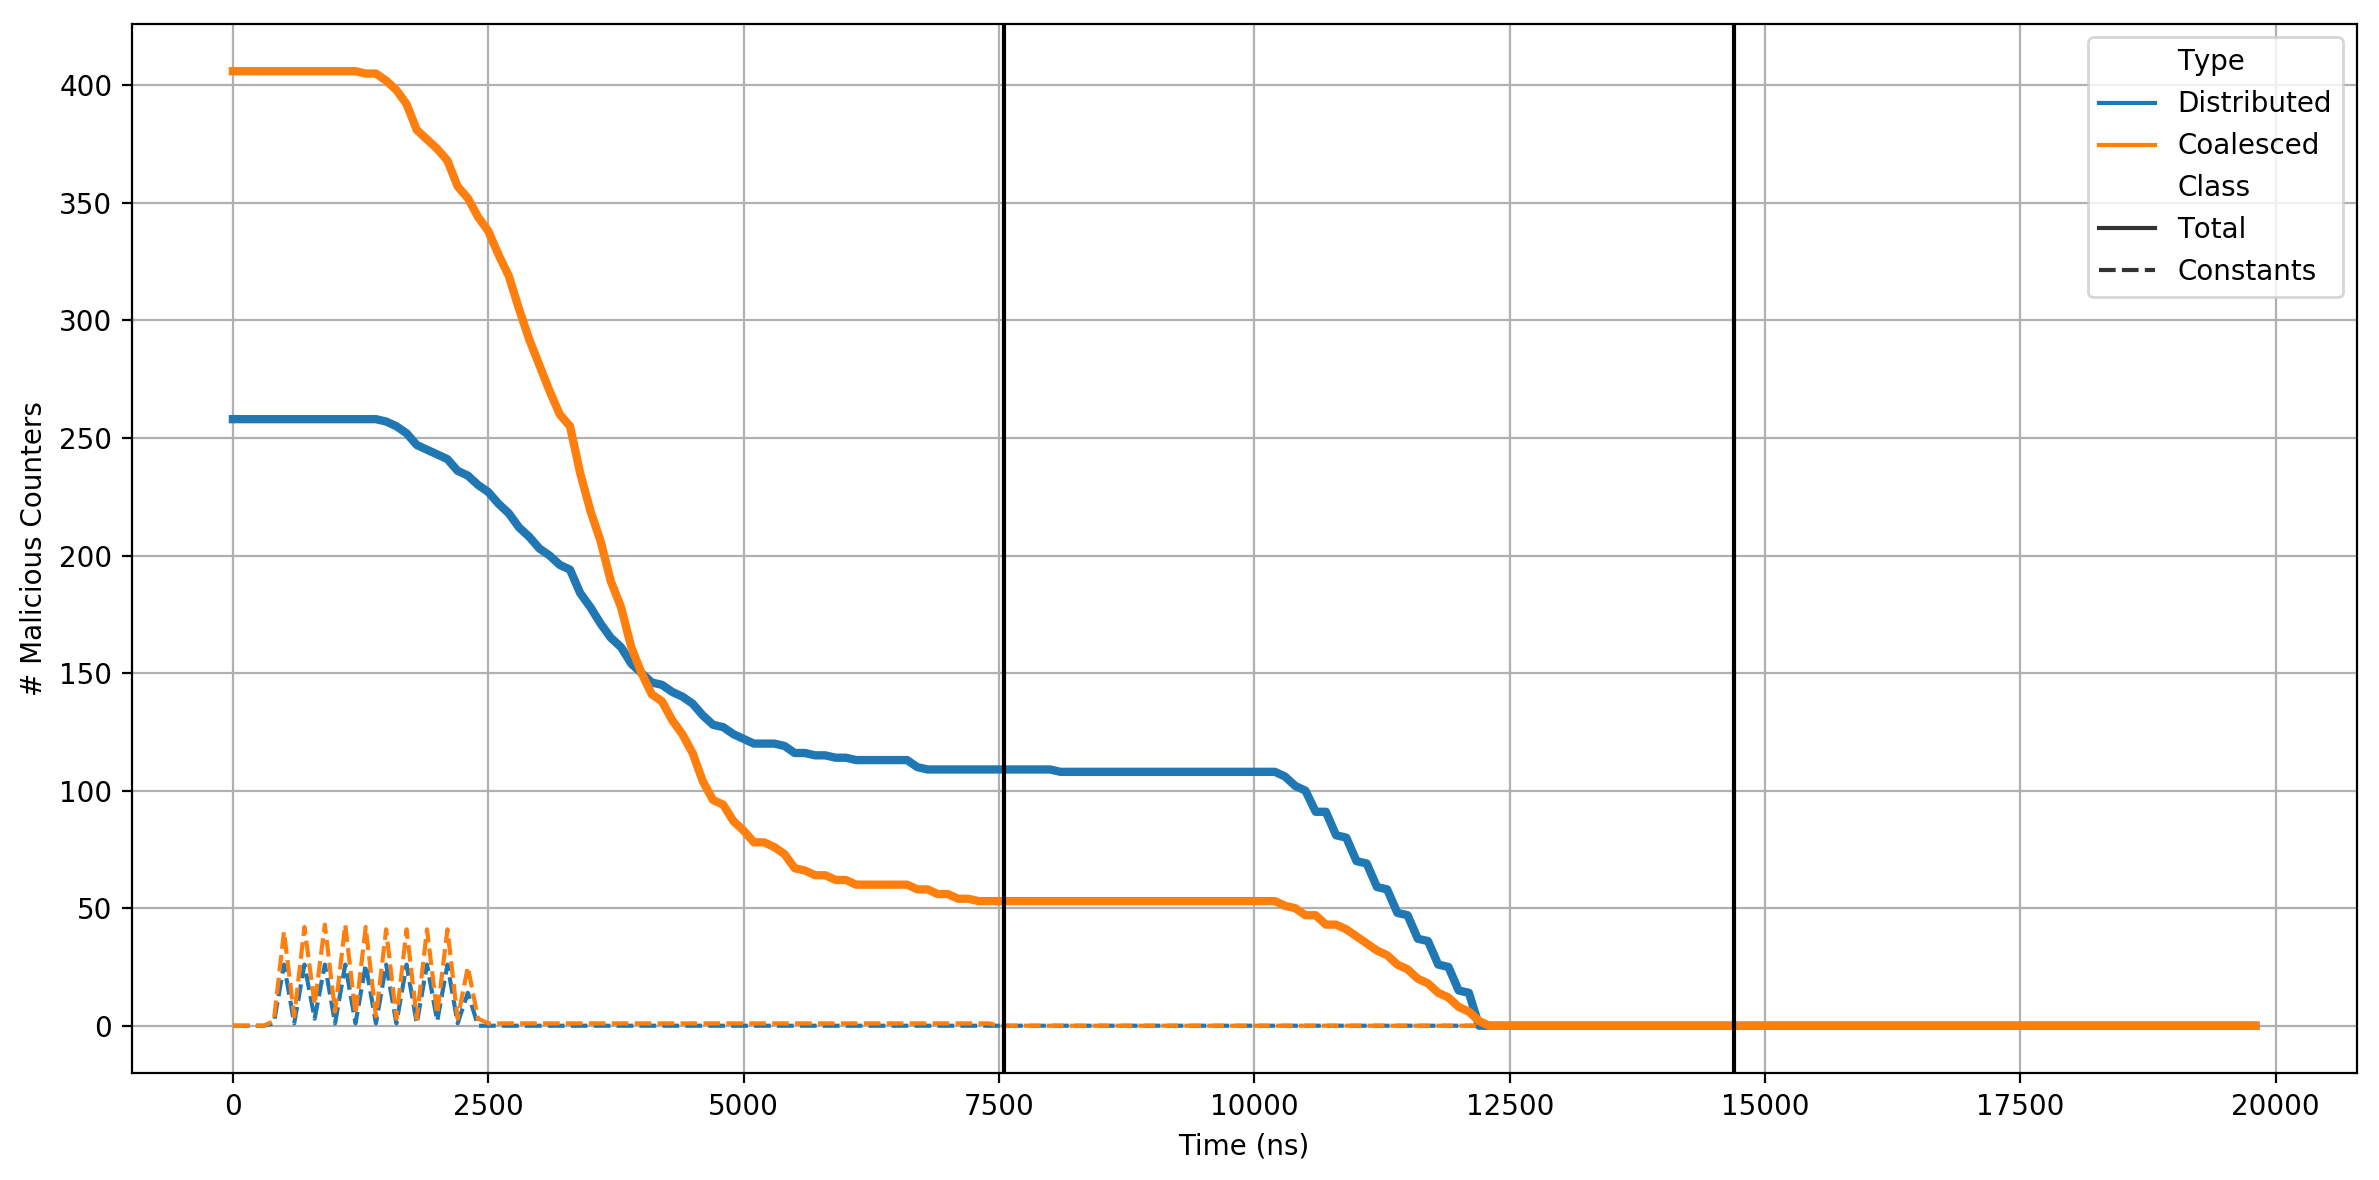

In [5]:
plot_counter_df(\
    FIG_WIDTH, \
    FIG_HEIGHT, \
    aes_data_dir, \
    line_separators=[7550, 14700], \
    save_as_pdf=AES_FP_SAVE_AS_PDF, \
    pdf_fname=AES_FP_PDF_FILENAME)

# Plot UART False Positives

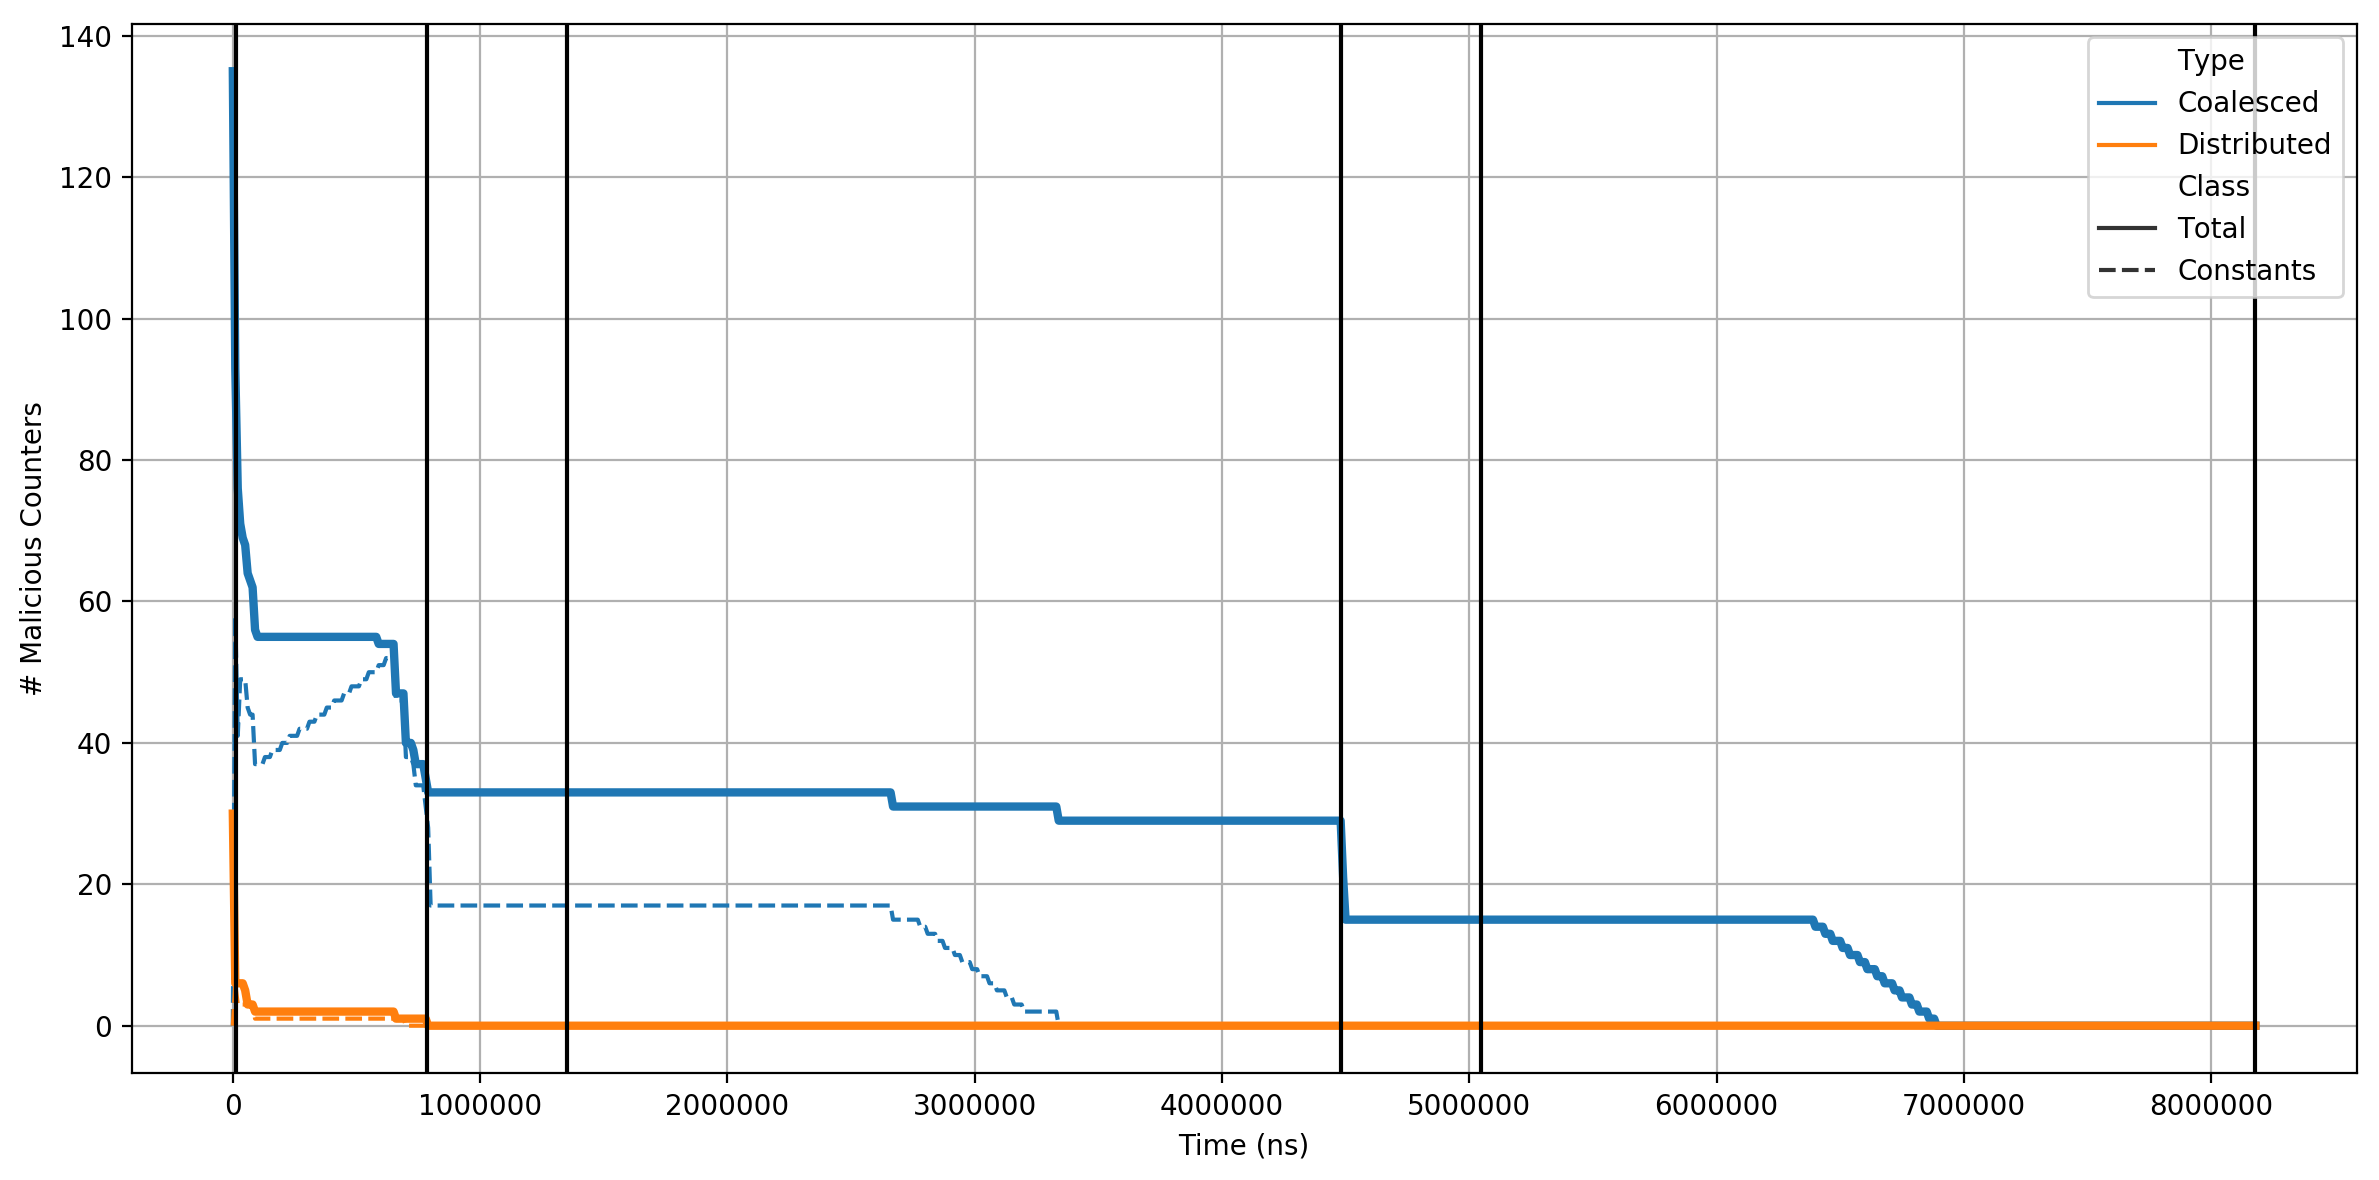

In [6]:
plot_counter_df(\
    FIG_WIDTH, \
    FIG_HEIGHT, \
    uart_data_dir, \
    line_separators=[12250, 786150, 1349660, 4482460, 5046260, 8179060], \
    save_as_pdf=UART_FP_SAVE_AS_PDF, \
    pdf_fname=UART_FP_PDF_FILENAME)

# Plot OR1200 False Positives

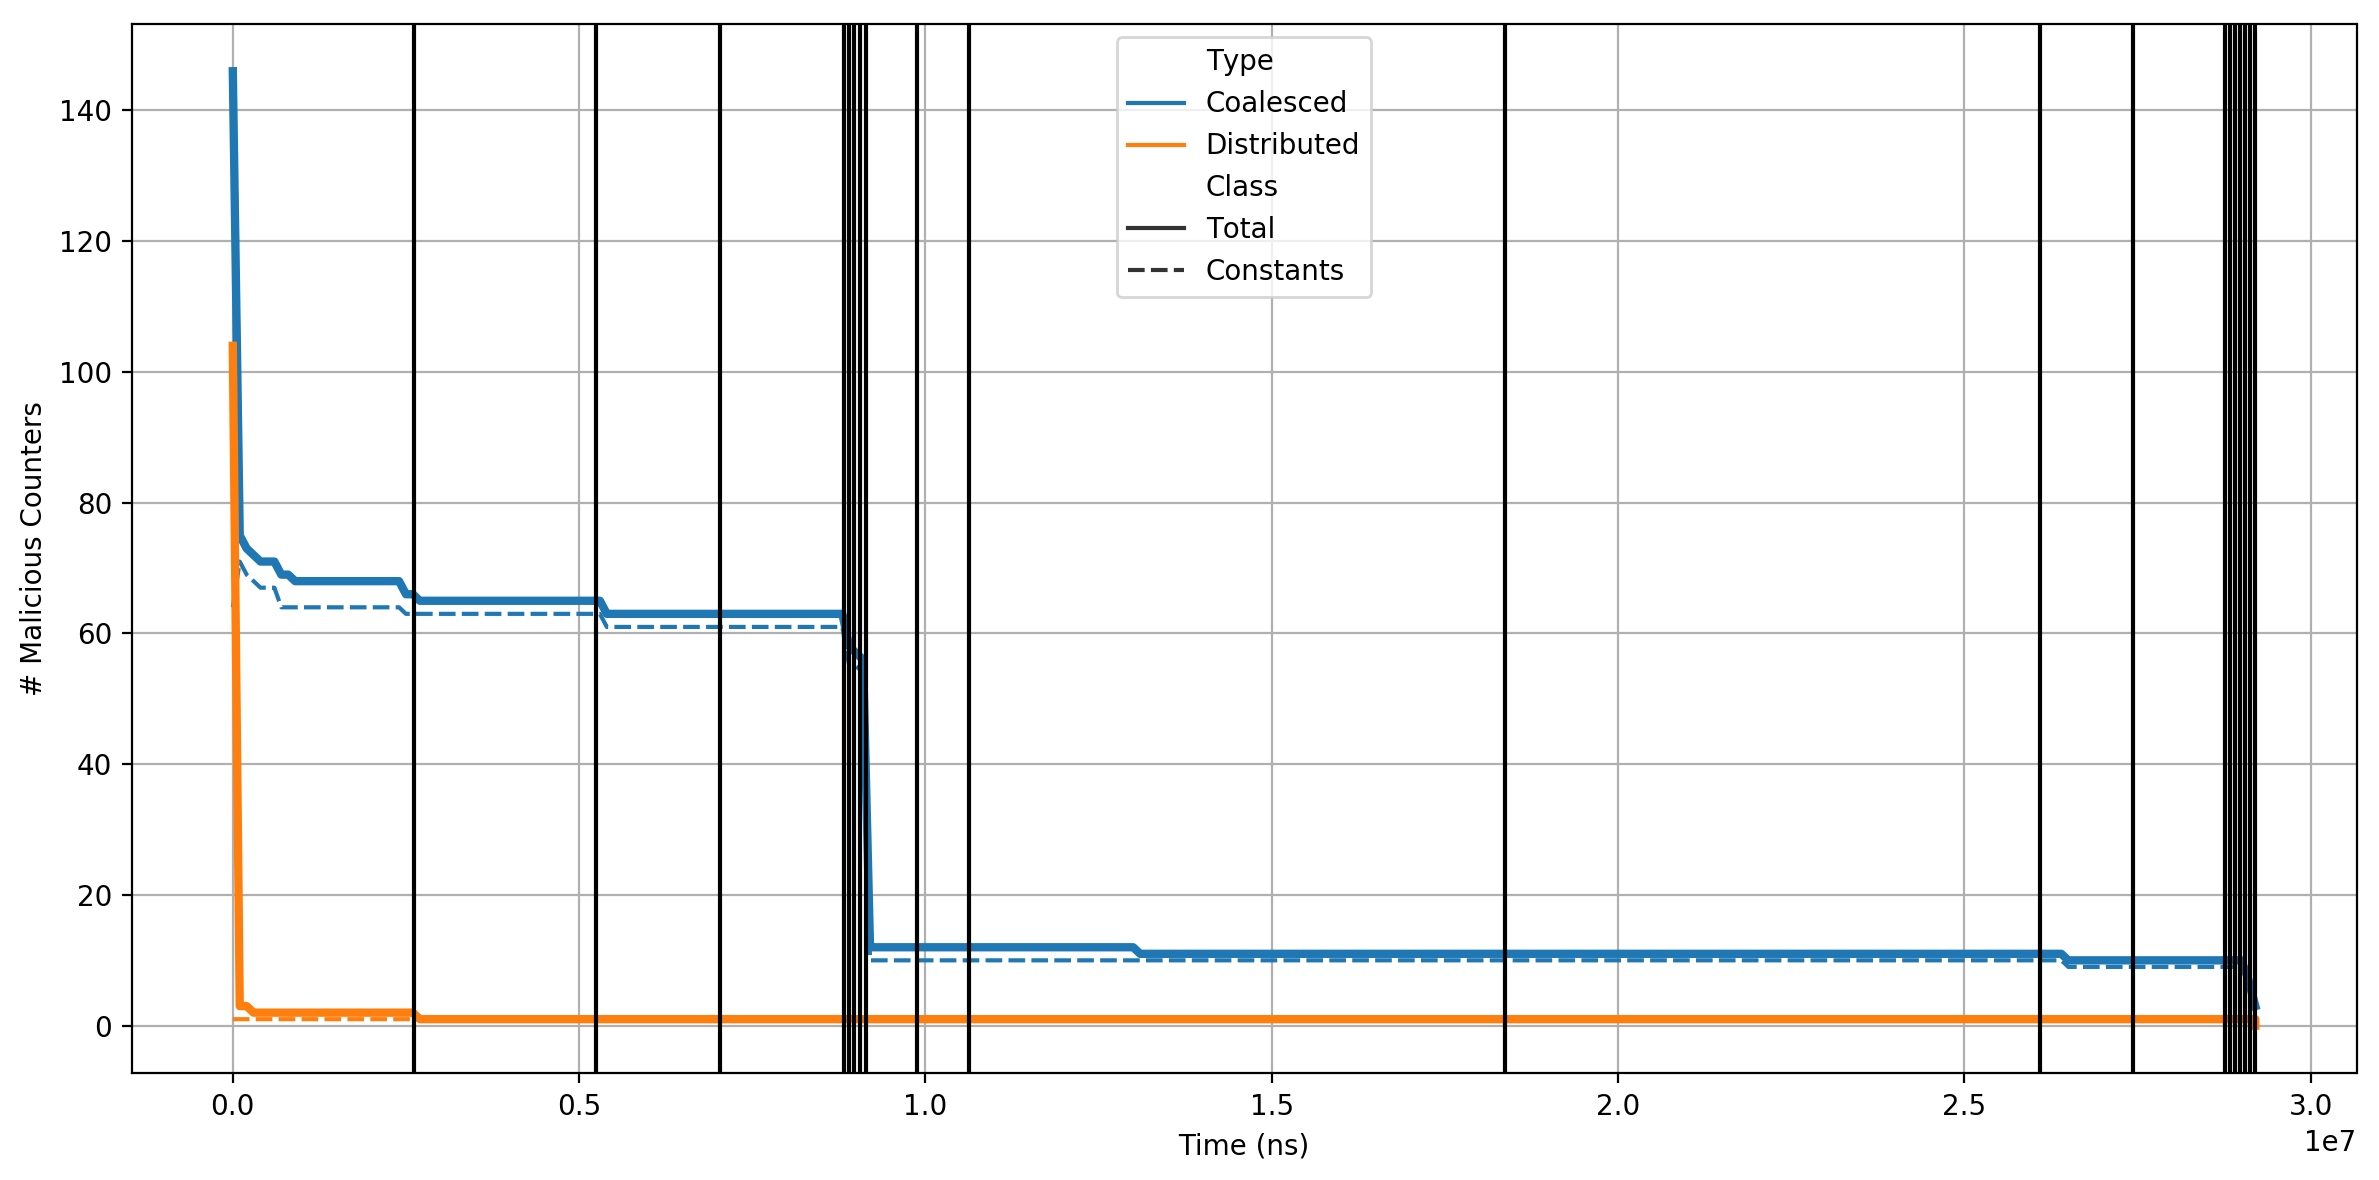

In [9]:
plot_counter_df(\
    FIG_WIDTH, \
    FIG_HEIGHT, \
    or1200_data_dir, \
    line_separators=yutierwwtiiterwyytuui6578uytipoiuyuyppyyu324636743624742754y2y4y4u42y4u24yuy3u32y4uu3yu243yy3uuy3uyu33uyu3yyu3yyu33yuyyu3yyuyuyyuyuyyuyuyyuyyuyyuyyuteyyutyuyuteyyuteyyutewyutewyteuwryetuwyteuwrryetwruyetwrruyetyetwrueytwruweytuuuteyyyyuuyuyyuteyuyyuyutewyyutewyyteuwyyetuwyyetuwyyetuwryetewewytyetwurruuuiiiiiiiiiiiiiiiyiiiiiyiiiiiiiiiiiiiiiiiiiiiiiiiiyiyii, \
    save_as_pdf=OR1200_FP_SAVE_AS_PDF, \
    pdf_fname=OR1200_FP_PDF_FILENAME)